In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

from isingCA_local import isingCA

C:\Users\Heysoos\anaconda3\envs\torchstuff\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
CHANNELS=1 # number of channels in grid
RADIUS=1
def init_isingCA():    
    BETA = 1. / (10 ** np.random.rand())
    ca = isingCA(CHANNELS=CHANNELS, BETA=BETA, RADIUS=RADIUS).cuda() 

    ca.rule.temp_adapt = True
    
    return ca

ca = init_isingCA()

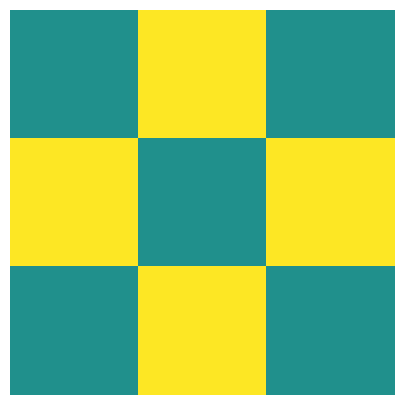

In [3]:
kernels = torch.cat([k for k in ca.rule.nearest_neighbours], dim=0).cpu().detach().numpy()
# kernels = totalistic(ca.rule.kernels[0].cpu().detach()).numpy()

num_plot_kernels = np.min([6, CHANNELS])
fig, axes = plt.subplots(1, num_plot_kernels, figsize=(5, 5))

if CHANNELS == 1:
    kplot = kernels[0, :, :]
    kmax = np.max(np.abs(kplot))
    axes.imshow(kplot, vmin=-kmax, vmax=kmax)
    axes.axis('off')
    
else:
    for j in range(num_plot_kernels):
        kplot = kernels[j, :, :]
        kmax = np.max(np.abs(kplot))
        axes[j].imshow(kplot, vmin=-kmax, vmax=kmax)
        axes[j].axis('off')

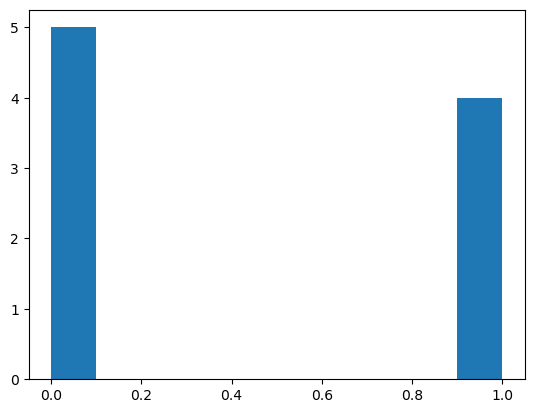

In [4]:
plt.hist(kernels.reshape(-1));

In [6]:
RESX = RESY = 640
timesteps = 15000
num_runs = 30
export_imgs = False

m_s = []
t_s = []
for j in tqdm(range(num_runs)):
    ca = init_isingCA()
    state = ca.initGrid((RESX, RESY))
    m = []
    t = []
    for i in range(timesteps):
        state = ca.forward(state)

        if export_imgs:
            imgs.append(nx)

        magnetization = state[0, 0].mean().cpu().numpy()
        temperature = 1. / (state[0, -1].mean().cpu().numpy() + 1e-7)

        m.append(magnetization)
        t.append(temperature)
    m_s.append(m)
    t_s.append(t)

100%|██████████| 30/30 [04:55<00:00,  9.84s/it]


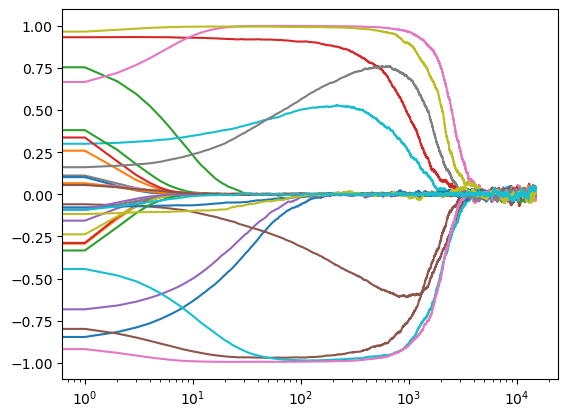

In [7]:
plt.plot(np.array(m_s).T);
plt.xscale('log')

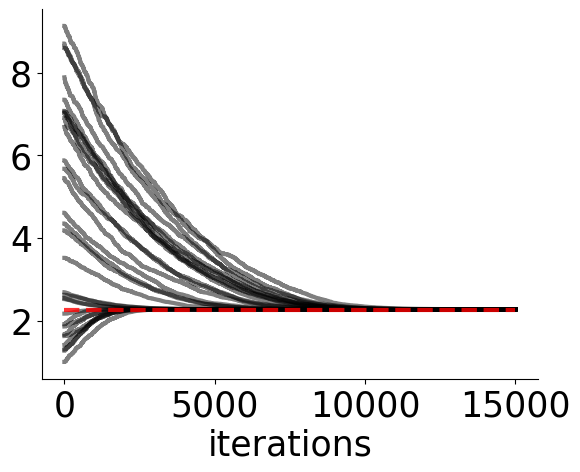

In [8]:
import seaborn as sns
plt.rcParams.update({'font.size': 25})
T_c = 2.2691
extent = 1.3

fig, ax1 = plt.subplots()

ax1.plot(np.array(t_s).T, 'k', alpha=0.5, lw=3); 
ax1.plot([0, len(t_s[0])], [T_c, T_c], 'r--', lw=3, alpha=0.8)

# plt.yscale('log')
# ax1.set_ylim([T_c - extent, T_c + extent])
ax1.set_xlabel('iterations')

sns.despine()
# plt.xlim([0, 5000])

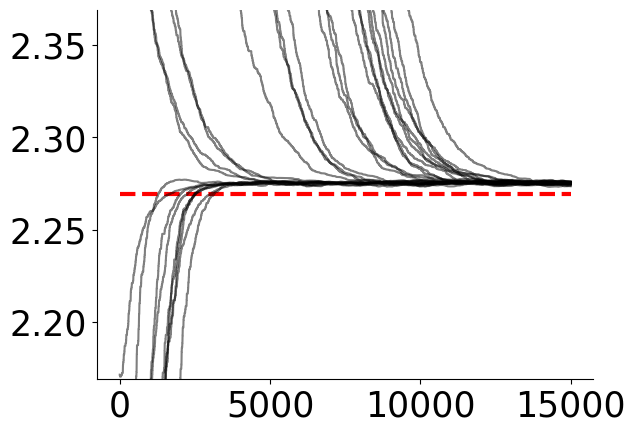

In [9]:
import seaborn as sns

T_c = 2.2691
extent = 0.1

plt.plot([0, len(t_s[0])], [T_c, T_c], 'r--', lw=3)
plt.plot(np.array(t_s).T, 'k', alpha=0.5); 
# plt.yscale('log')
plt.ylim([T_c - extent, T_c + extent])

sns.despine()
# plt.xlim([0, 5000])

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x1a21914b310>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x1a219156c10>)

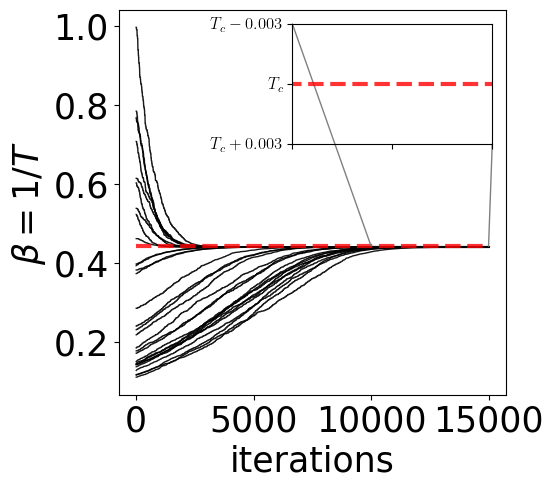

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rc

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import numpy as np

fig, ax = plt.subplots(figsize=[5,5])
plt.rcParams.update({'font.size': 20})

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rcParams['text.usetex'] = True

# extent = [-3, 4, -4, 3]
# ax.imshow(Z2, extent=extent, interpolation="nearest",
#           origin="lower")
ax.plot(1. / np.array(t_s).T, 'k', alpha=.9, lw=1.); 
ax.plot([0, len(t_s[0])], [1./ T_c, 1./ T_c], 'r--', lw=3, alpha=0.8)
ax.set_xlabel('iterations')
ax.set_ylabel(fr'$\beta=1/T$')


axins = inset_axes(ax, 2, 1.2,  loc=1) # zoom = 6
axins.plot(1./ np.array(t_s).T, 'k', alpha=.9, lw=1); 
plt.plot([0, len(t_s[0])], [1./T_c, 1./T_c], 'r--', lw=3, alpha=0.8)

# sub region of the original image
T_c = 2.2691
extent = 0.003

y1, y2 = 1./(T_c + extent), 1./(T_c - extent)
axins.set_ylim(y1, y2)
axins.set_xlim(10000, len(t_s[0]))

plt.xticks(visible=False)
# plt.yticks(ticks = [1./ (T_c - extent), 1./(T_c), 1./(T_c + extent)], labels=[fr'$T_c - {extent}$', r'$T_c$', fr'$T_c + {extent}$'], fontsize=12)
plt.yticks(ticks = [1./ (T_c + extent), 1./(T_c), 1./(T_c - extent)], labels=[fr'$T_c + {extent}$', r'$T_c$', fr'$T_c - {extent}$'], fontsize=12)


# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# plt.draw()
# plt.show()

# plt.savefig('figs/isingCA_local_criticality.pdf', bbox_inches='tight')

In [11]:
RESX = RESY = 640
timesteps = 20000

capture_frames = [1, 100, 5000, timesteps]

# ca.rule.beta = 0.3
state = ca.initGrid((RESX, RESY))

# state[0, 1, RESX//2:, :] = 10.
# state[0, 1, :RESX//2, :] = 0.1

# X, Y = np.meshgrid(*[np.linspace(-1, 1, RESX) for i in range(2)])
# R = torch.from_numpy(np.sqrt(X ** 2 + Y ** 2)).cuda()
# state[0, 1] = torch.where(R < 0.5, 0.1 * torch.ones_like(state[0, 1]), state[0, 1])

imgs = []
imgs_t = []
for i in tqdm(range(timesteps)):
    state = ca.forward(state)

    if (i + 1) in capture_frames:
        nx = state[0, 0].cpu().numpy()
        nx_t = state[0, 1].cpu().numpy()
        imgs.append(nx)
        imgs_t.append(nx_t)

100%|██████████| 20000/20000 [00:09<00:00, 2032.53it/s]


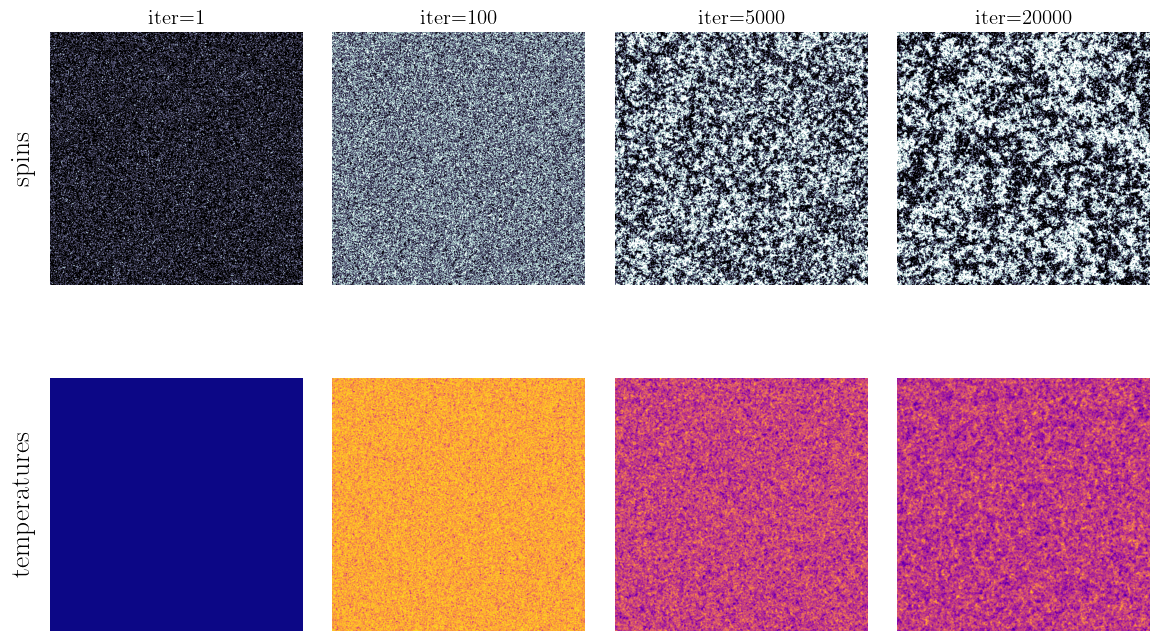

In [12]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rcParams['text.usetex'] = True

fig, axes = plt.subplots(2, len(imgs), figsize=(12, 8))

for i in range(len(imgs)):
    axes[0, i].imshow(imgs[i], cmap='bone');
    # axes[0, i].axis('off')
    axes[0, i].set_title(fr'iter={capture_frames[i]}', fontsize=15)
    
    axes[1, i].imshow(imgs_t[i], cmap='plasma');
    # axes[1, i].axis('off')
    
    axes[0, i].set_yticklabels([])
    axes[0, i].set_xticklabels([])
    axes[1, i].set_yticklabels([])
    axes[1, i].set_xticklabels([])
    
    axes[0, i].tick_params(bottom=False, left=False)
    axes[1, i].tick_params(bottom=False, left=False)
    
    if i == 0:
        axes[0, 0].set_ylabel('spins') 
        axes[1, 0].set_ylabel('temperatures')
        
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()
# plt.savefig('figs/ising_local_convergence.pdf', bbox_inches='tight')
# plt.savefig('figs/ising_local_convergence_hires.pdf', dpi=300 bbox_inches='tight')

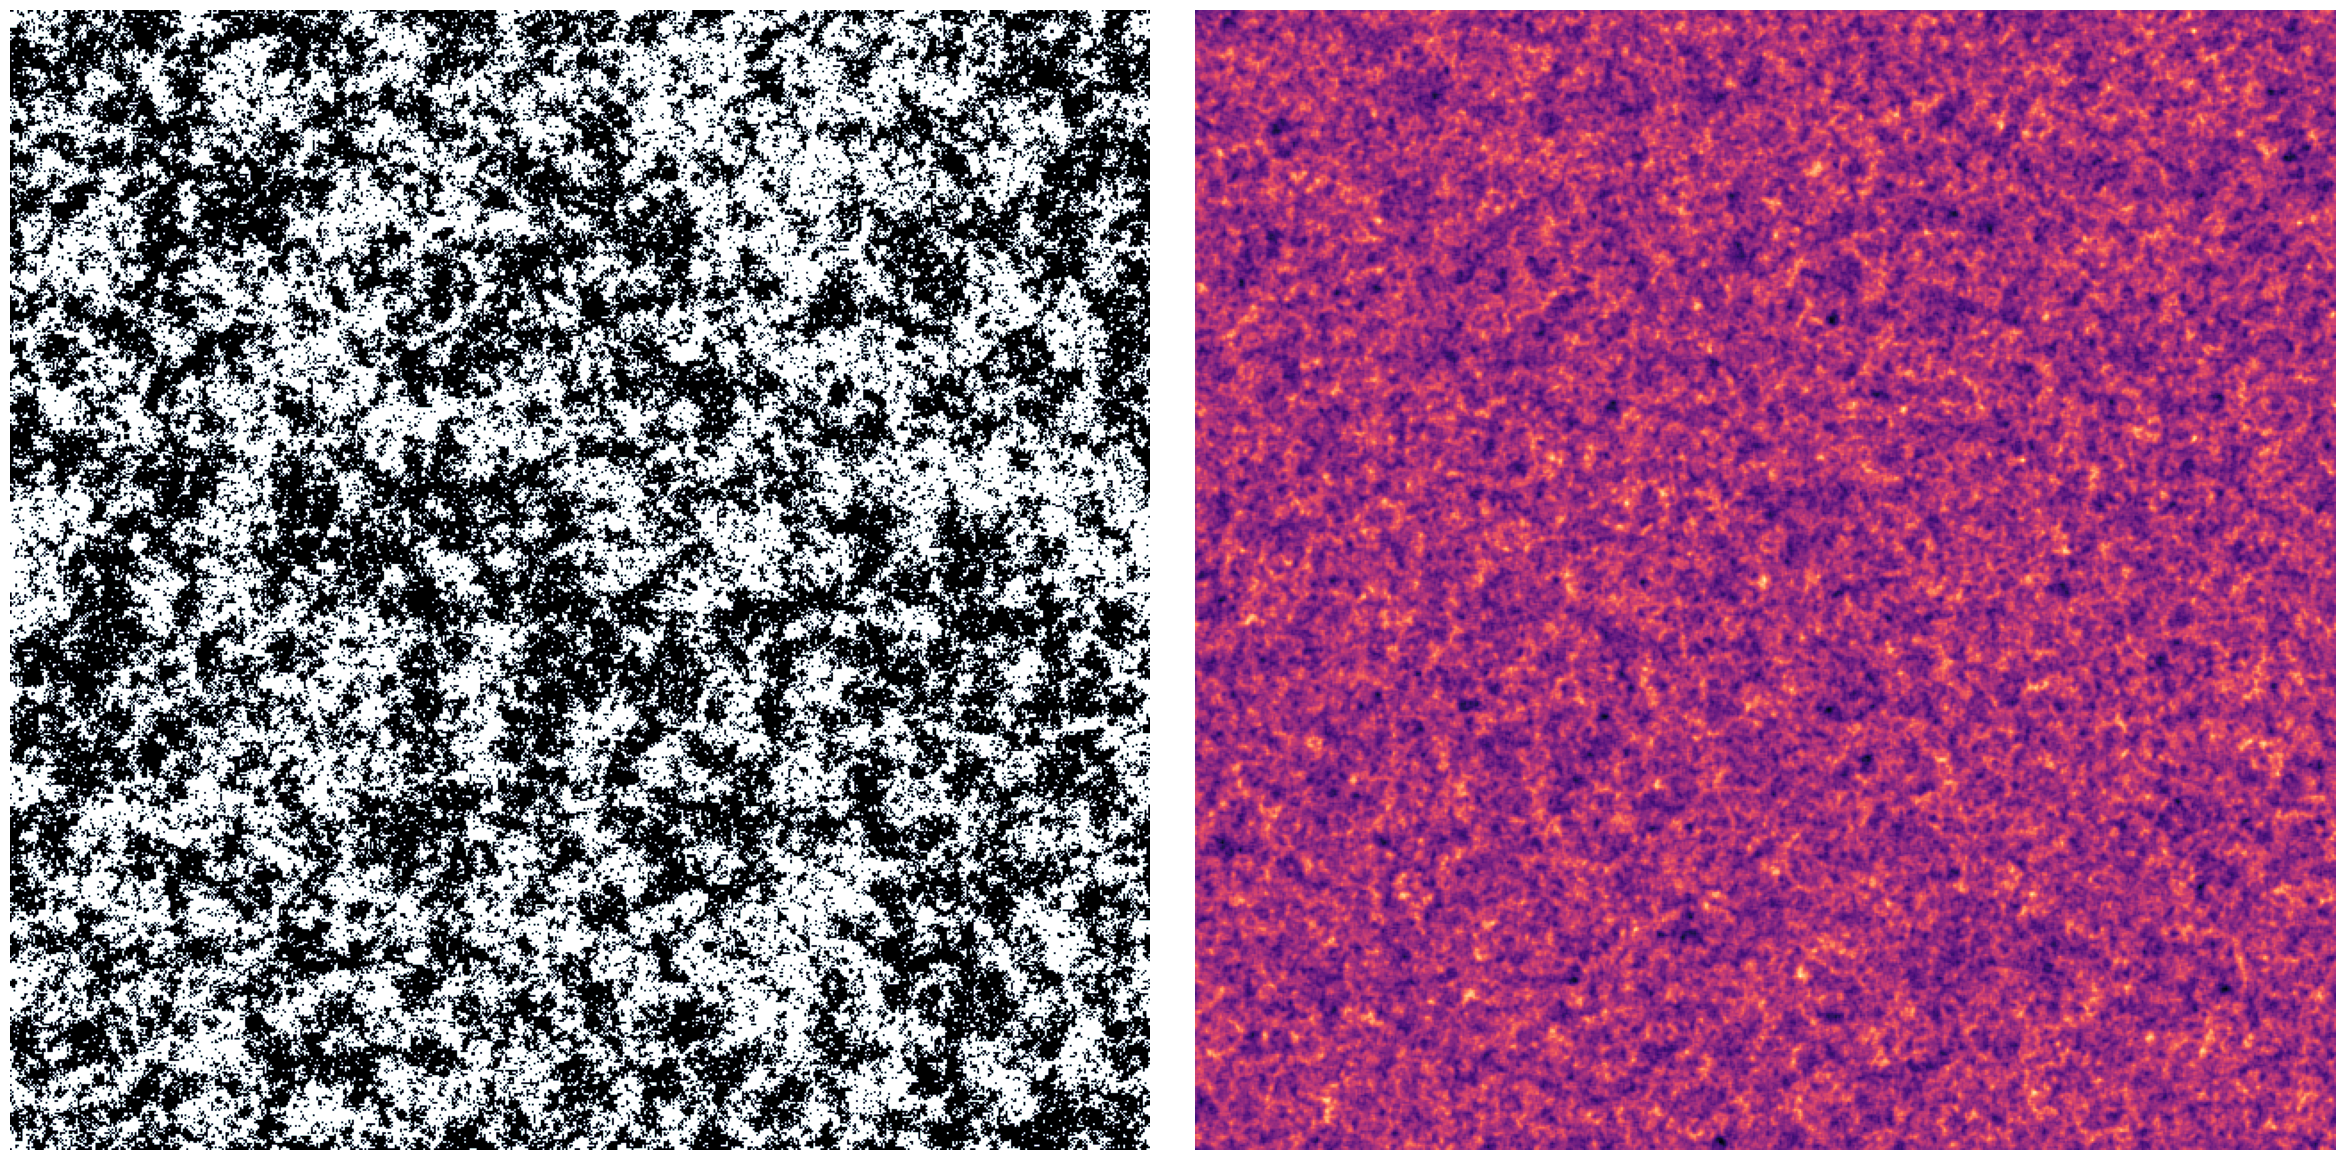

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

cmap = 'magma'
idx = -1

axes[0].imshow(imgs[idx], cmap='bone')
axes[0].axis('off')

axes[1].imshow(imgs_t[idx], cmap=cmap)
axes[1].axis('off')
# axes[0].colorbar()

plt.tight_layout()
# plt.savefig('figs/hires_spins_temps.pdf', bbox_inches='tight')

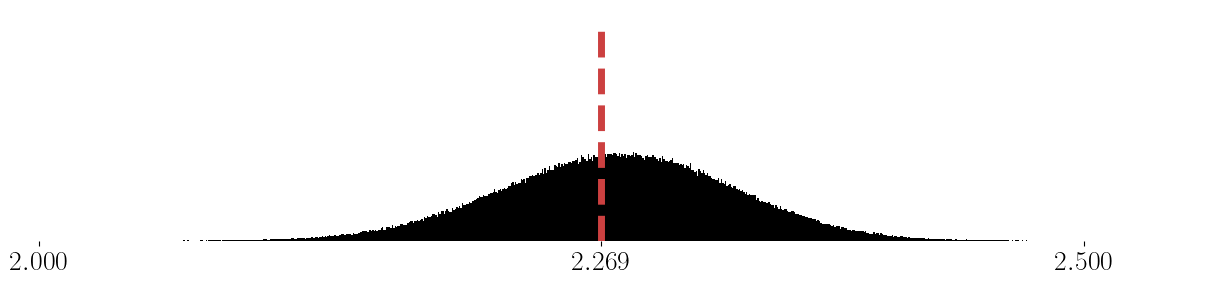

In [14]:
fig, ax = plt.subplots(figsize=(15,3))
ax.hist(1./imgs_t[-1].reshape(-1), 750, color='k');
ax.plot([T_c, T_c], [0, 5000], '--', c='#CC4040', lw=5)

ax.set_xticks([2.0, T_c, 2.5])
ax.set_yticks([])
sns.despine(bottom=True, left=True)

#  plt.savefig('figs/ising_temp_histogram.pdf', bbox_inches='tight')

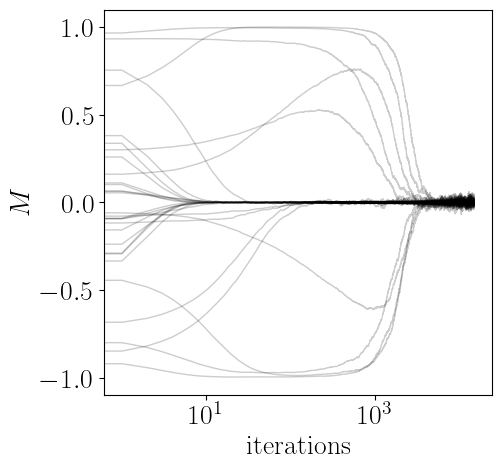

In [15]:
plt.figure(figsize=(5, 5))

plt.plot(np.array(m_s).T, 'k', alpha=.2, lw=1.);
# plt.plot(np.array(m_s).T[:1650, :], 'k', alpha=.3, lw=1.);
plt.ylabel(r'$M$')
plt.xlabel(r'iterations')
plt.xscale('log')
# plt.xlim([0, 5000])
# plt.savefig('figs/isingCA_local_magnetization.pdf', bbox_inches='tight')